In [52]:
import math
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot
from sklearn.datasets import load_diabetes
print(pd.__version__)

1.3.4


In [53]:
diabet = load_diabetes(as_frame=True)

In [54]:
print(diabet.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [55]:
diabet = pd.concat([diabet.data, diabet.target], axis=1, join='inner')

In [56]:
diabet.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [57]:
diabet.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


<AxesSubplot:>

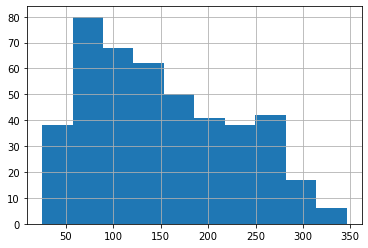

In [58]:
diabet['target'].hist()
#from the histogram of the target data below, we can see that there is a rather 'left skewed' distribution on the data.

In [59]:
# bmi effect on diabetes progression, age effect on diabetes progression, age and blood sugar, bmi and sugar level, blood sugar and progression

# Given the objective: “What are the factors that contribute to the disease progression of a diabetes patient?”, we will explore 5 questions/assumption 
#     points using the data to observe the relationships between calculated factors and the progressions of diabetes in patients.

# Though not a fact, we would typically associate age and unhealthy lifestyle with the progressions of medical conditions in general. 
#     Along with that, Diabetes is more commonly known as a medical condition that persists due to high blood sugar. Taking into consideration these
#     common assumptions, observation will be taken to see whether there is any relation with these factors.

,age,s6
age,1.000000,0.301731
s6,0.301731,1.000000


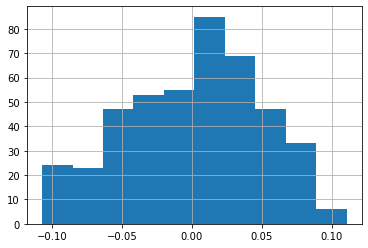

In [60]:
#1

# First will be looking into the relationship between age and blood sugar with the question, "Does age effect a higher build up of blood sugar levels?".

#looking through a histogram the distribution of age in the the data
diabet['age'].hist()

#finding the correlation between age and blood sugar levels ("s6")
diabet[["age","s6"]].corr()

<AxesSubplot:xlabel='age', ylabel='s6'>

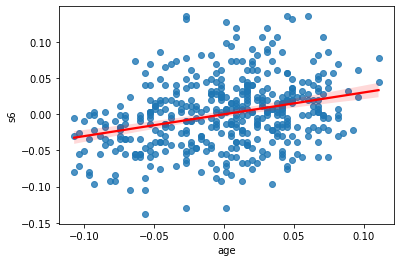

In [61]:
#creating a scatterplot to see the relationship between age and blood sugar levels ("s6")
sns.regplot(data=diabet, x="age", y="s6", line_kws={"color": "red"})

In [62]:
# First of all, here we see a positive correlation which reflects that as age increases the rate of blood sugar also increases,
#     though there is a smaller rate of increase in blood sugar levels compared to age.
# Although we cannot conclude for sure that age has an effect to blood sugar levels, we can see that there is some correlation between the two factors. 
# Note that, to have a fuller view, there needs to be a separate study for this, since there might be other factors that effects this relationship.

# Looking at the age histogram, we can see a quite normal distribution of age in the data.

# Looking at the scatter plot itself, we can see that there is quite a scattered spread between age and blood sugar, and we can also see that there
#     is a somewhat visible regression on the data. The general scatter of the plot follow a clear positive increase linear shape.

In [63]:
#2

# Following the observation on age, next will be looking into whether age has a direct relationship with the progression of the disease,
#     with the question, "Does the progression of diabetes increase with the increase in age?".

#looking at the direct correlation between age and disease progression ("target")
diabet[["age","target"]].corr()

,age,target
age,1.000000,0.187889
target,0.187889,1.000000


<AxesSubplot:xlabel='age', ylabel='target'>

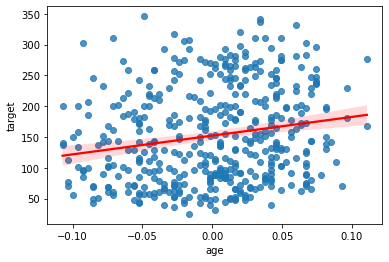

In [64]:
#creating a scatterplot to see the relationship between age and disease progression ("target")
sns.regplot(data=diabet, x="age", y="target", line_kws={"color": "red"})

In [65]:
# First looking at the correlation between age and disease progression ("target"), it is seen that there is a positive correlation, which means that
#     as age increases so does the disease progression. However looking at the number itself, it is much lower than the correlation between age and 
#     blood sugar (almost about a third of it).
    
# From an earlier histogram plot of the disease progression ("target"), it is known that there is a left skewed distribution on the data, meaning that
#     there were more patients with lower progression than others. 
# This is further reflected with the scatter plot between age and disease progressions where it can be seen that there is a more concentrated 
#     amount of data below the regression line and a more scattered data above the line. 
# Also note that there is a slightly bigger error window on the line for this plot compared to the one before. 
# Another thing to note is that looking at the scatter plot it is visible that the highest datas for disease progression 
#     can be seen in various age points from left to right. 
# Through this, it can be concluded that there isn't a big significance in the relationship between age and disease progression.

,bmi,s6
bmi,1.00000,0.38868
s6,0.38868,1.00000


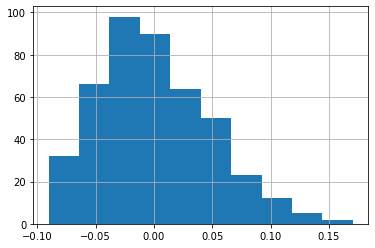

In [66]:
#3

# Next will be looking into the relationship between bmi and blood sugar with the question, "Does bmi effect a higher build up of blood sugar levels?".

#looking through a histogram the distribution of bmi in the the data
diabet['bmi'].hist()

#finding the correlation between bmi and blood sugar levels ("s6")
diabet[["bmi","s6"]].corr()

<AxesSubplot:xlabel='bmi', ylabel='s6'>

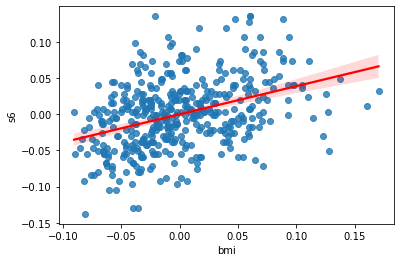

In [67]:
#creating a scatterplot to see the relationship between bmi and blood sugar levels ("s6")
sns.regplot(data=diabet, x="bmi", y="s6", line_kws={"color": "red"})

In [68]:
# First of all, here we see a positive correlation which reflects that as bmi increases the rate of blood sugar also increases.
# Though there is a smaller rate of increase in blood sugar levels compared to bmi, we can also see that the correlation between bmi and blood sugar
#        levels is slightly higher to the correlation between age and blood sugar levels.
# Although we cannot conclude for sure that bmi has an effect to blood sugar levels, we can see that there is some correlation between the two factors. 
# Note that, to have a fuller view, there needs to be a separate study for this, since there might be other factors that effects this relationship.

# Looking at the bmi histogram, we can see that there is a left skew on the distribution of bmi data in the dataframe.

# We can further see this in the scatter plot where majority of the data is distributed in the left quadrant of the plot. Although it does have a
#     linear regressional shape, the error of the linear line gets slightly bigger as the number of the bmi data increases. 
# Therefore, although it is visually accepted that there is a positive linear relationship between bmi and blood sugar level, 
#     it is still imprecise conclude this relationship.

In [69]:
#4

# Following the observation on bmi, next will be looking into whether bmi has a direct relationship with the progression of the disease,
#     with the question, "Does the progression of diabetes increase with the increase in bmi?".

#looking at the direct correlation between bmi and disease progression ("target")
diabet[["bmi","target"]].corr()

,bmi,target
bmi,1.00000,0.58645
target,0.58645,1.00000


<AxesSubplot:xlabel='bmi', ylabel='target'>

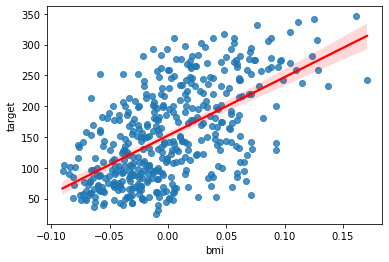

In [70]:
#creating a scatterplot to see the relationship between bmi and disease progression ("'target")
sns.regplot(data=diabet, x="bmi", y="target", line_kws={"color": "red"})

In [71]:
# First looking at the correlation between bmi and disease progression ("target"), it is seen that there is a positive correlation, which means that
#     as bmi increases so does the disease progression. Furthermore, looking at the number tiself, we can see that there is a much higher correlation than 
#     any of the previous factor couples, especially here it is seen that the rate at which disease progression increases with bmi is almost 5 times
#     higher than that of age and disease progression.
    
# From an earlier histogram plot of the disease progression ("target"), it is known that there is a left skewed distribution on the data, meaning that
#     there were more patients with lower progression than others. 
# Following that, the histogram for bmi is also left skewed, this is reflected in the final scatter plot with both having a majority of the data points 
#     concentrated on the left quadrant of the plot, with even more on the points below the regressions line. 
# As both bmi and disease progressions increase however, there is a more scattering of data points, and as well the window of
#     error with the regression line also widens.
    
# From the scatter plot itself, it is visible that there is a somewhat clearer linear regressional shape to the plot, reflecting a linear relationship between
#     the increase of bmi and disease progression.
# It is also more visible that there is a clear course at which the data points move, where most (almost possibly, all) lower disease progression is reflected
#     with those with lower bmi levels and majority of the higher disease progression is reflected with higher bmi levels as well.
# Therefore through this, it can be concluded that there is a somewhat significant relationship between bmi and disease progression.

,s6,target
s6,1.000000,0.382483
target,0.382483,1.000000


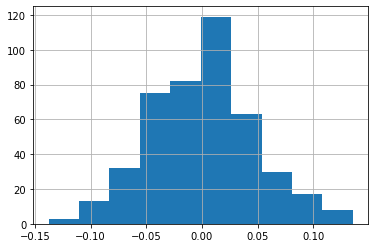

In [72]:
#5

# Finally, a more direct approach will be taken to look into a factor that may effect the progression of diabetes. This time will be looking into
#     whether blood sugar level has any direct effect on disease progression with the question, "Does a patient's blood sugar level have a direct
#     relationship to affecting the progression of the disease(diabetes)?".

#looking through a histogram the distribution of sugar level("s6") in the the data
diabet['s6'].hist()

#looking at the direct correlation between sugar level("s6") and disease progression ("target")
diabet[["s6","target"]].corr()

<AxesSubplot:xlabel='s6', ylabel='target'>

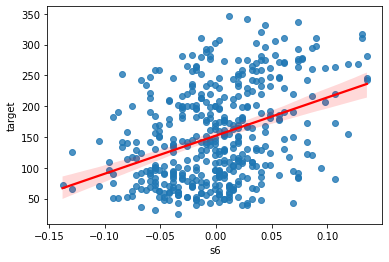

In [73]:
#creating a scatterplot to see the relationship between sugar level("s6") and disease progression ("target")
sns.regplot(data=diabet, x="s6", y="target", line_kws={"color": "red"})

In [74]:
# First looking at the correlation between sugar level ("s6") and disease progression ("target"), it is seen that there is a positive correlation, 
#     which means that as a patient's sugar level increases so does the disease progression. 
# However, looking at the number tiself, we can see that the number doesn't reflect that there is a big significant correlation between the two.
    
# From an earlier histogram plot of the disease progression ("target"), it is known that there is a left skewed distribution on the data, meaning that
#     there were more patients with lower progression than others. 
# Following that, the histogram for sugar level however has a more normal distribution. This is reflected in the final scatter plot where the majority of
#     data points can be seen is concentrated in the center of the chart.
# There is more scattering of points in both ends of the plot with also the error window visibly wider than it is in the middle.
    
# From the scatter plot itself, it is visible that there is a linear regressional shape to the plot, reflecting a linear relationship between
#     the increase of sugar levels and disease progression.
# The linear relationship between sugar level and disease progression can be seen clearly in the plot, with most of the lower disease progressions seen
#     with lower sugar levels, and most (almost all) of the higher disease progression placed with higher sugar levels.
# It is seen that a major concentration of the data points is found in the center of the plot with it being even more concentrated below the regression line,
#     while the data points placed above the line can be seen as more widely dispersed.
# Although not as significant as the correlation between bmi and disease progression, the correlation between sugar levels and disease progression
#     has some significance and effect.
# Therefore through this, it can be concluded that there is a somewhat significant relationship between sugar levels and disease progression. However, 
#     a further observation would be needed to conclude whether the correlation is accurate since the type of diabetes is not known and
#     there could be other factors that affects the progression.